(2018-Spring-PHYS104-Grade-Analysis)=
# Grade Analysis

````{panels}
Course Information
^^^
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-zv4m"><span style="font-weight:bold">Semester</span>:</th>
    <th class="tg-zv4m">Spring 2018</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-zv4m"><span style="font-weight:bold">Meet Time</span>:</td>
    <td class="tg-zv4m">TR 1:30pm - 2:45pm</td>
  </tr>
  <tr>
    <td class="tg-zv4m"><span style="font-weight:bold">Credit Hours</span>:</td>
    <td class="tg-zv4m">4</td>
  </tr>
  <tr>
    <td class="tg-zv4m"><span style="font-weight:bold">Class Size</span>:</td>
    <td class="tg-zv4m">249</td>
  </tr>
  <tr>
    <td class="tg-zv4m"><span style="font-weight:bold">DFWI</span>:</td>
    <td class="tg-zv4m">59</td>
  </tr>
  <tr>
    <td class="tg-zv4m"><span style="font-weight:bold">Effective Score</span>:</td>
    <td class="tg-zv4m">3.86</td>
  </tr>
</tbody>
</table>
````

Homework was administer and manage through Sapling Learning. Turning Point class-room clickers were used for in class participation. Multiple choice questions were adequate for classroom engagement but not sufficiently engaging to students. Better practices need to be adopted to keep students thinking while questions are on screen because most students submit an answer in a few seconds then proceed to browse the internet on their devices.

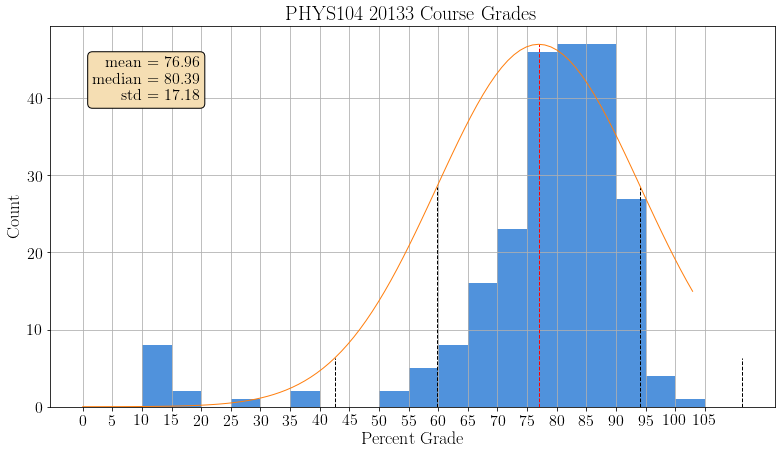

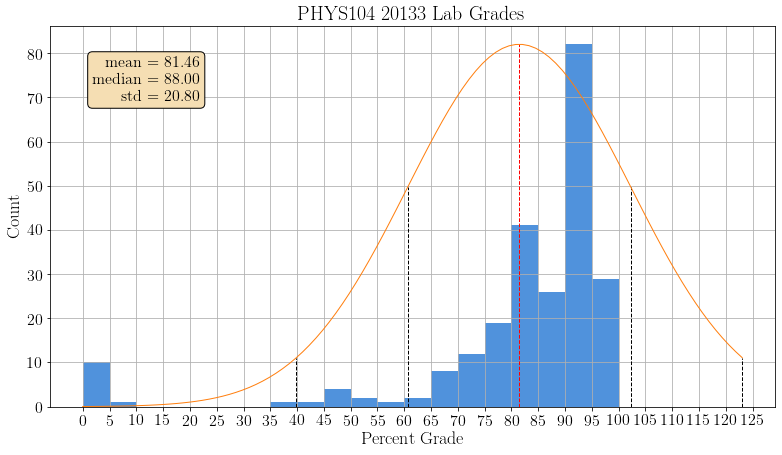

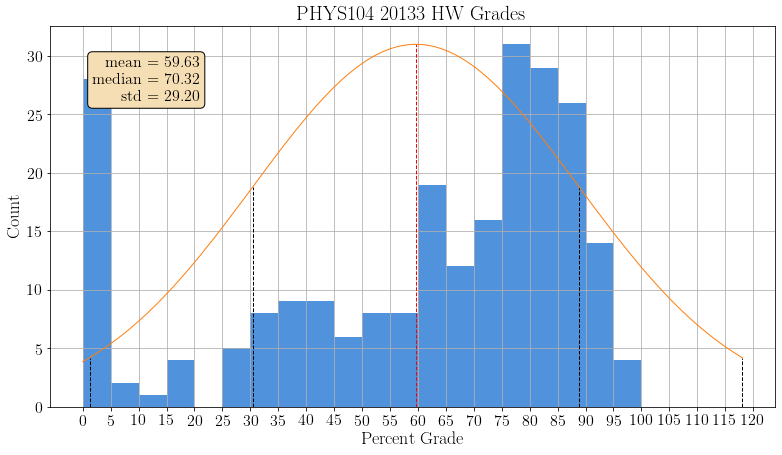

In [151]:
# import modules
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rc
# set font to tex interpreter
rc('text',usetex=True)
rc('font',family='serif')
import numpy as np
plt.ion()

sos=pd.read_excel('../../../../Student-Opinion-Surveys/201703-PHYS104-SOS.xlsx',sheet_name='sos')
gb=pd.read_csv('gc_201820_SPRING_PHYS104N_20116_fullgc.csv')

def MakeHistogram(x,*args):
    plt.subplots(figsize=(13,7))
    FACECOLOR=np.array([80,146,220])/255

    if np.max(x)>100:
        bins2plot=np.arange(0,np.max(x)+5,5)
    else:
        bins2plot=np.arange(0,105,5)
    n, bins, patches = plt.hist(x,bins=bins2plot,
                                edgecolor=None,
                                linewidth=.1,
                                facecolor=FACECOLOR,
                                )

    # Gaussian model of data
    MEAN = np.mean(x)
    STD = np.std(x)
    VAR = np.var(x)
    HEIGHT=max(n)
    def ygauss(X):
        return np.exp(-(X-MEAN)**2/(2*STD**2))

    # define range of x values to plot the fits to histogram
    if STD*2+MEAN > np.max(x):
        xfitmax = STD*2+MEAN 
    else:
        xfitmax = np.max(x)
    if np.max(x) > 100:
        xfitmax = np.max(x)
    if xfitmax < 100:
        xfitmax = 100

    # plot vertical bars representing the mean and standard deviations on histogram
    xstd = np.array([-2*STD, -1*STD, 1*STD, 2*STD]+MEAN)
    ystd = HEIGHT*ygauss(xstd)
    plt.plot([MEAN, MEAN], [0, HEIGHT*ygauss(MEAN)],
             color='red',
             linestyle='--',
             linewidth=1,
            )
    for ii in np.arange(0, xstd.shape[0]):
        plt.plot([xstd[ii],xstd[ii]],[0,ystd[ii]] ,
                 color='black',
                 linewidth=1,
                 linestyle='--'
                )

    # plot curve of gaussian fit to the histogram
    xfit = np.linspace(0,xfitmax,100)
    yfit = HEIGHT*ygauss(xfit)
    plt.plot(xfit,yfit,linewidth=1)

    # add title and axis labels
    plt.text(200,375,
             'mean $=$ %.2f \n median $=$ %.2f \n std $=$ %.2f' %(MEAN,np.median(x), STD),
             va='center',
             ha='right',
             backgroundcolor='white',
             fontsize=16,
             bbox=dict(boxstyle='round', facecolor='wheat'),
             transform=None
            )
    plt.xlabel('Percent Grade',fontsize=18)
    plt.ylabel('Count',fontsize=18)
    if len(args)!=0:
        plt.title(args[0],fontsize=20)
    plt.xticks(np.arange(0,xfitmax+5,5),fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    

MakeHistogram(gb['Course Grade'],'PHYS104 20133 Course Grades')
MakeHistogram(gb['Lab'],'PHYS104 20133 Lab Grades')
MakeHistogram(gb['HW'],'PHYS104 20133 HW Grades')

In [256]:
import ipywidgets as widgets

test1=widgets.FloatSlider(
    value=100,
    min=0,
    max=100,
    step=.01,
    description='Test 1:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)
test2=widgets.FloatSlider(
    value=100,
    min=0,
    max=100,
    step=.01,
    description='Test 2:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)
test3=widgets.FloatSlider(
    value=100,
    min=0,
    max=100,
    step=.01,
    description='Test 3:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)
Lab=widgets.FloatSlider(
    value=100,
    min=0,
    max=100,
    step=.01,
    description='Lab:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)
Participation=widgets.FloatSlider(
    value=100,
    min=0,
    max=100,
    step=.01,
    description='Participation:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)
Homework=widgets.FloatSlider(
    value=100,
    min=0,
    max=100,
    step=.01,
    description='Homework:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)
FinalExam=widgets.FloatSlider(
    value=100,
    min=0,
    max=100,
    step=.01,
    description='Final Exam:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)

CourseGrade=widgets.Text(
    value='%.2f'%100,
    placeholder='Type something',
    description='Grade:',
    disabled=True
)

def on_value_change(change):
    CourseGrade.value='%.2f'%(
        .15*Lab.get_interact_value()+
        .10*Participation.get_interact_value()+
        .10*Homework.get_interact_value()+
        .20*(np.sum([test1.get_interact_value(),
                    test2.get_interact_value(),
                    test3.get_interact_value()
                    ]
                )-
            np.min([test1.get_interact_value(),
                    test2.get_interact_value(),
                    test3.get_interact_value()
                    ]
                  )
            )
            +
        .25*FinalExam.get_interact_value()
    )
    
Lab.observe(on_value_change)
Participation.observe(on_value_change)
Homework.observe(on_value_change)
test1.observe(on_value_change)
test2.observe(on_value_change)
test3.observe(on_value_change)
FinalExam.observe(on_value_change)

left_box = widgets.VBox([Lab,Participation,Homework,test1,test2,test3,FinalExam])
right_box = widgets.VBox([CourseGrade])
widgets.VBox([left_box, right_box])